Nama : Nurlisa Widyaningsih <br>
NIM : 211351108<br>
Kelas : IF Pagi B<br>

#Import Datasets

Untuk langkah pertama dari segala-galanya, kita akan melakukan pengunduhan datasets.

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"nurlisawidyaningsih","key":"ebabc74b24f8d7c16c7ae9714798b4f9"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [ ]:
!kaggle datasets download -d uciml/adult-census-income

In [ ]:
!unzip adult-census-income.zip -d datasets
!ls datasets

Archive:  adult-census-income.zip
replace datasets/adult.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

#Import Library

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import tree
import pickle

#Data Discovery

Ditahap ini langkah pertama yang akan kita lakukan adalah memasukkan data yang tadi telah diextract kedalam sebuah variable.

In [6]:
df = pd.read_csv('datasets/adult.csv')
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


Melihat apakah terdapat nilai null pada datasets.

In [7]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

Terdapat 73 nilai unique age, yaa menandakan range umur pada datasets ini adalah 73.

In [8]:
df.nunique()

age                  73
workclass             9
fnlwgt            21648
education            16
education.num        16
marital.status        7
occupation           15
relationship          6
race                  5
sex                   2
capital.gain        119
capital.loss         92
hours.per.week       94
native.country       42
income                2
dtype: int64

In [9]:
df['education'].unique()

array(['HS-grad', 'Some-college', '7th-8th', '10th', 'Doctorate',
       'Prof-school', 'Bachelors', 'Masters', '11th', 'Assoc-acdm',
       'Assoc-voc', '1st-4th', '5th-6th', '12th', '9th', 'Preschool'],
      dtype=object)

Diatas merupakan data unique yang terdapat pada kolom education, ada 16 tingkat edukasi.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


Datasets ini memiliki 32561 baris data. Cukup banyak untuk dianalisis dengan mendetail. Dengan 15 columns.

In [11]:
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [12]:
df.duplicated().sum()

24

Terdapat 24 duplicate data, kemungkinan besar akan kita hilangkan pada proses preprocessing nanti.

#EDA

<Axes: xlabel='hours.per.week', ylabel='age'>

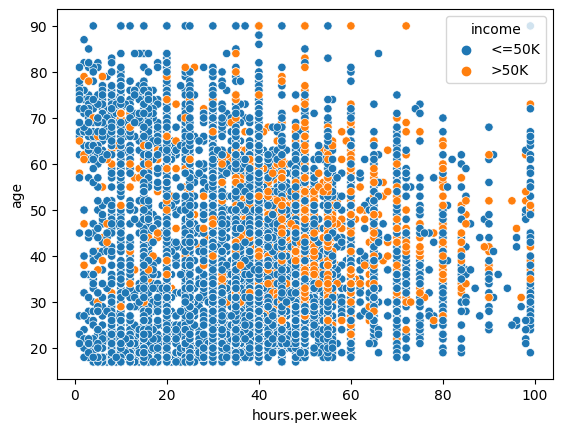

In [13]:
sns.scatterplot(x = 'hours.per.week', y= 'age', hue = 'income', data = df)

Diatas merupakan plot scatter antara hours.per.week dan age. Bisa dilihat disini kebanyakan orang berumur 20an masih belum berhasil memiliki income diatas 50k.

<Axes: xlabel='income', ylabel='count'>

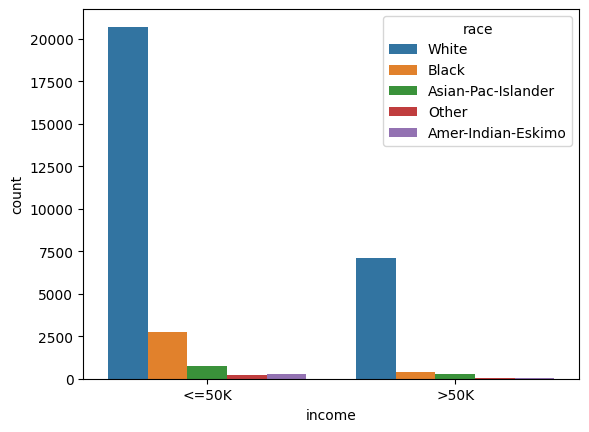

In [14]:
sns.countplot(x = 'income', hue = 'race', data = df)

plot diatas menunjukkan bahwa orang putih(Whites) memiliki income lebih dari 50k sedangkan ras lain hanya sedikit.

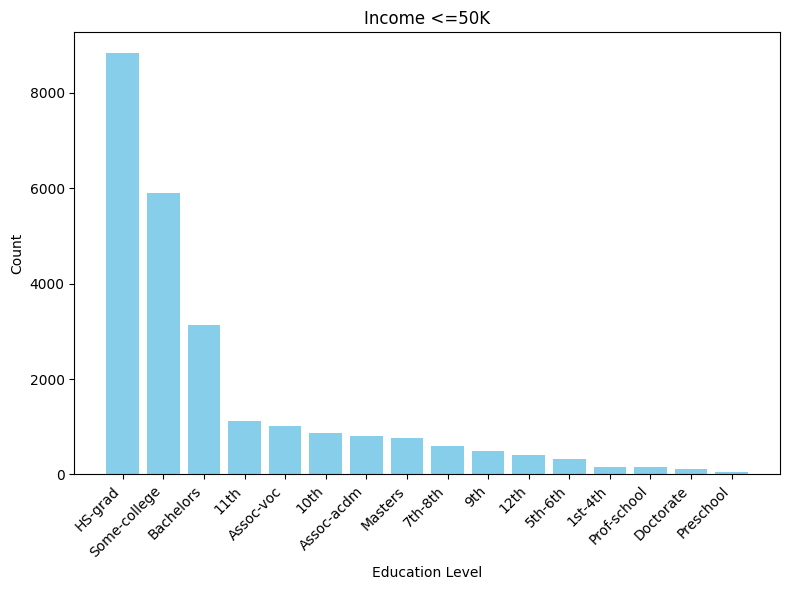

In [15]:
income_0 = df[df["income"] == '<=50K']
income_1 = df[df["income"] == '>50K']

fig0, ax0 = plt.subplots(figsize=(8, 6))  # Adjust figure size as needed
education_counts_0 = income_0["education"].value_counts()
ax0.bar(education_counts_0.index, education_counts_0, color="skyblue")
ax0.set_xlabel("Education Level")
ax0.set_ylabel("Count")
ax0.set_title("Income <=50K")
plt.xticks(rotation=45, ha="right")  # Rotate labels for readability
plt.tight_layout()
plt.show()

Menurut bar plot diatas orang dengan pendapatan dibawah 50k pertahunnya biasanya merupakan lulusan High School(SMA/SMK).

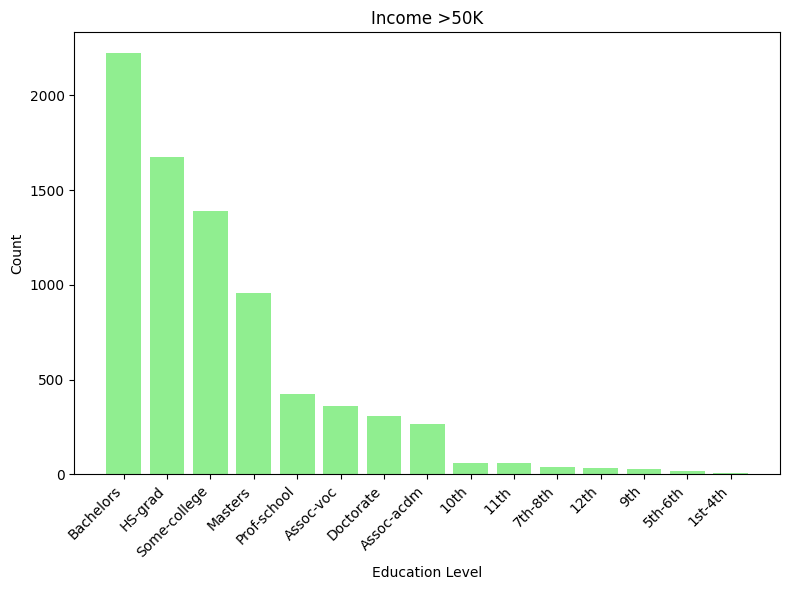

In [16]:
# Plot for income 1
fig1, ax1 = plt.subplots(figsize=(8, 6))  # Adjust figure size as needed
education_counts_1 = income_1["education"].value_counts()
ax1.bar(education_counts_1.index, education_counts_1, color="lightgreen")
ax1.set_xlabel("Education Level")
ax1.set_ylabel("Count")
ax1.set_title("Income >50K")
plt.xticks(rotation=45, ha="right")  # Rotate labels for readability
plt.tight_layout()
plt.show()

Sedangkan orang berpendapatan diatas 50k pertahunnya merupakan lulusan S1, diikuti dengan High School dan diperingkat 4 ada lulusan Masters. Mungkin karena lulusan Masters itu lebih langka dibandingkan High School-grad. Jadi menurut saya wajar saja jika ianya tidak terlalu banyak. Jika dibandingkan dengan plot income dibawah 50k, magister sangatlahh rendah. Menyimpulkan mayoritas lulusan Master memiliki pendapatan diatas 50k pertahunnya.

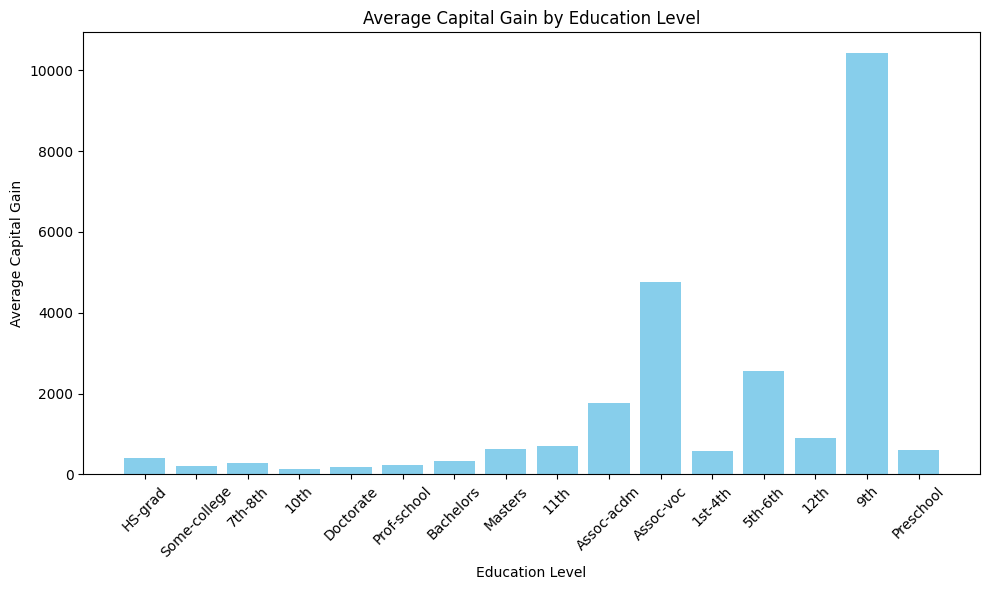

In [17]:
education_levels = df["education"].unique()  # Replace with your actual column name

# Calculate average capital gain for each education level
avg_capital_gain = df.groupby("education")["capital.gain"].mean()  # Replace with your actual column names

# Create the bar plot
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.bar(education_levels, avg_capital_gain, color="skyblue")

# Rotate x-axis labels for readability
plt.xticks(rotation=45)

# Add labels and title
plt.xlabel("Education Level")
plt.ylabel("Average Capital Gain")
plt.title("Average Capital Gain by Education Level")

plt.tight_layout()
plt.show()

Diatas merupakan korelasi antara kolom education level dan avg capital gain yang bisa didapatkan oleh lulusan tertentu.

#Preprocessing

Pertama-tama, kita akan menghilangkan data duplicate yang tadi ditemukan.

In [18]:
df=df.drop_duplicates(keep="first")

In [19]:
df.duplicated().sum()

0

Sudah aman ya, tidak ada data duplicate.

Saat melihat datasetsnya terdapat nilai "?" pada beberapa baris data. Kita akan mengubah nilai-nilai "?" itu dengan nilai modus dari masing-masing kolom.

In [20]:
df["workclass"]=df["workclass"].replace("?",np.nan)
df["occupation"]=df["occupation"].replace("?",np.nan)
df["native.country"]=df["native.country"].replace("?",np.nan)

In [21]:
df.isna().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     582
income               0
dtype: int64

Bisa dilihat yaa, terdapat 1836 data yang null pada workclass, 1843 data null pada occupation dan 582 data null pada native.country.

In [22]:
df["workclass"]=df["workclass"].fillna(df["workclass"].mode()[0])
df["occupation"]=df["occupation"].fillna(df["occupation"].mode()[0])
df["native.country"]=df["native.country"].fillna(df["native.country"].mode()[0])

Kita memasukkan nilai modusnya hanya pada nilai-nilai yang null.

In [23]:
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Private,77053,HS-grad,9,Widowed,Prof-specialty,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,Private,186061,Some-college,10,Widowed,Prof-specialty,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


Berhasil yaa.

Kita akan mengubah nilai preschool hingga grade 12 yang ada pada education dan menggantinya menjadi school, agar tidak terlalu banyak data unique. Kita juga akan menghapus kolom education.num karena ianya memberikan data/informasi yang sama seperti kolom education. Kita lakukan ini agar tidak ada data redudansi.

In [24]:
df.drop(['education.num'], axis = 1, inplace = True)
df['education'].replace(['11th', '9th', '7th-8th', '5th-6th', '10th', '1st-4th', 'Preschool', '12th'],
                             ' School', inplace = True)
df['education'].value_counts()

HS-grad         10494
Some-college     7282
Bachelors        5353
 School          4248
Masters          1722
Assoc-voc        1382
Assoc-acdm       1067
Prof-school       576
Doctorate         413
Name: education, dtype: int64

In [25]:
df  = df.drop("sex", axis=1)
df  = df.drop("race", axis=1)
df  = df.drop("native.country", axis=1)
df = df.drop("fnlwgt", axis=1)

Menghapus kolom sex, race, native.country, dan fnlwgt karena tidak terlalu berpengaruh dengan hasil modelnya nanti.

In [26]:
X = df.drop(['income'], axis=1)
Y = df['income']

Memasukkan fitur dan targetnya untuk pemodelan nanti.

In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

In [28]:
le = LabelEncoder()
categorical = ['workclass','education', 'marital.status', 'occupation', 'relationship']
for feature in categorical:
        X_train[feature] = le.fit_transform(X_train[feature])
        X_test[feature] = le.transform(X_test[feature])

Mengubah nilai kategorial menjadi numerical dengan labelEncoder.

In [29]:
X_train

,age,workclass,education,marital.status,occupation,relationship,capital.gain,capital.loss,hours.per.week
13010,38,3,1,0,3,4,0,0,40
24494,20,3,0,4,2,3,0,0,40
16922,31,3,5,2,2,0,0,0,40
25335,23,3,8,4,7,4,0,0,25
12362,69,5,5,2,11,0,0,0,48
...,...,...,...,...,...,...,...,...,...
13126,35,3,0,5,7,1,0,0,30
19655,21,3,8,4,11,3,0,0,35
9847,70,1,8,6,0,1,0,0,17
10801,28,5,5,2,11,0,0,0,50


In [30]:
data = df.copy()
data

,age,workclass,education,marital.status,occupation,relationship,capital.gain,capital.loss,hours.per.week,income
0,90,Private,HS-grad,Widowed,Prof-specialty,Not-in-family,0,4356,40,<=50K
1,82,Private,HS-grad,Widowed,Exec-managerial,Not-in-family,0,4356,18,<=50K
2,66,Private,Some-college,Widowed,Prof-specialty,Unmarried,0,4356,40,<=50K
3,54,Private,School,Divorced,Machine-op-inspct,Unmarried,0,3900,40,<=50K
4,41,Private,Some-college,Separated,Prof-specialty,Own-child,0,3900,40,<=50K
...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,Some-college,Never-married,Protective-serv,Not-in-family,0,0,40,<=50K
32557,27,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,0,0,38,<=50K
32558,40,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,0,0,40,>50K
32559,58,Private,HS-grad,Widowed,Adm-clerical,Unmarried,0,0,40,<=50K


In [34]:
data['workclass'].unique()

array([3, 6, 0, 5, 4, 1, 7, 2])

In [31]:
le = LabelEncoder()
categorical = ['workclass','education', 'marital.status', 'occupation', 'relationship', 'income']
for feature in categorical:
        data[feature] = le.fit_transform(data[feature])
data

,age,workclass,education,marital.status,occupation,relationship,capital.gain,capital.loss,hours.per.week,income
0,90,3,5,6,9,1,0,4356,40,0
1,82,3,5,6,3,1,0,4356,18,0
2,66,3,8,6,9,4,0,4356,40,0
3,54,3,0,0,6,4,0,3900,40,0
4,41,3,8,5,9,3,0,3900,40,0
...,...,...,...,...,...,...,...,...,...,...
32556,22,3,8,4,10,1,0,0,40,0
32557,27,3,1,2,12,5,0,0,38,0
32558,40,3,5,2,6,0,0,0,40,1
32559,58,3,5,6,0,4,0,0,40,0


In [32]:
data.to_csv('data.csv', index=False)

#Modeling

Melakukan pemodelan dengan criterion entropy.

In [43]:
model_dtree = DecisionTreeClassifier(max_depth=4, criterion="entropy")
model_dtree.fit(X_train, Y_train)
Y_pred = model_dtree.predict(X_test)

In [44]:
print(Y_pred[0:5])
print(Y_test[0:5])

['<=50K' '<=50K' '<=50K' '<=50K' '<=50K']
24188    <=50K
26469    <=50K
26842    <=50K
8795      >50K
27178    <=50K
Name: income, dtype: object


In [45]:
print('Akurasi Decision Tree :', accuracy_score(Y_test, Y_pred))

Akurasi Decision Tree : 0.8191968858840402


Nice, kita berhasil mendapatkan 80% yang mana itu merupakan score yang cukup baik. Mari lihat hasil confusion matrixnya.

In [46]:
y_pred = model_dtree.predict(X_test)
confusion_matrix(Y_test, y_pred)

array([[7376,   34],
       [1731,  621]])

UFT, tidak terlihat terlalu baik ya...hasilnya condong lebih pada true positif sedangkan true negatifnya memiliki nilai yang lebih rendah dibanding false negatifnya.

#Visualisasi Hasil Algorithm

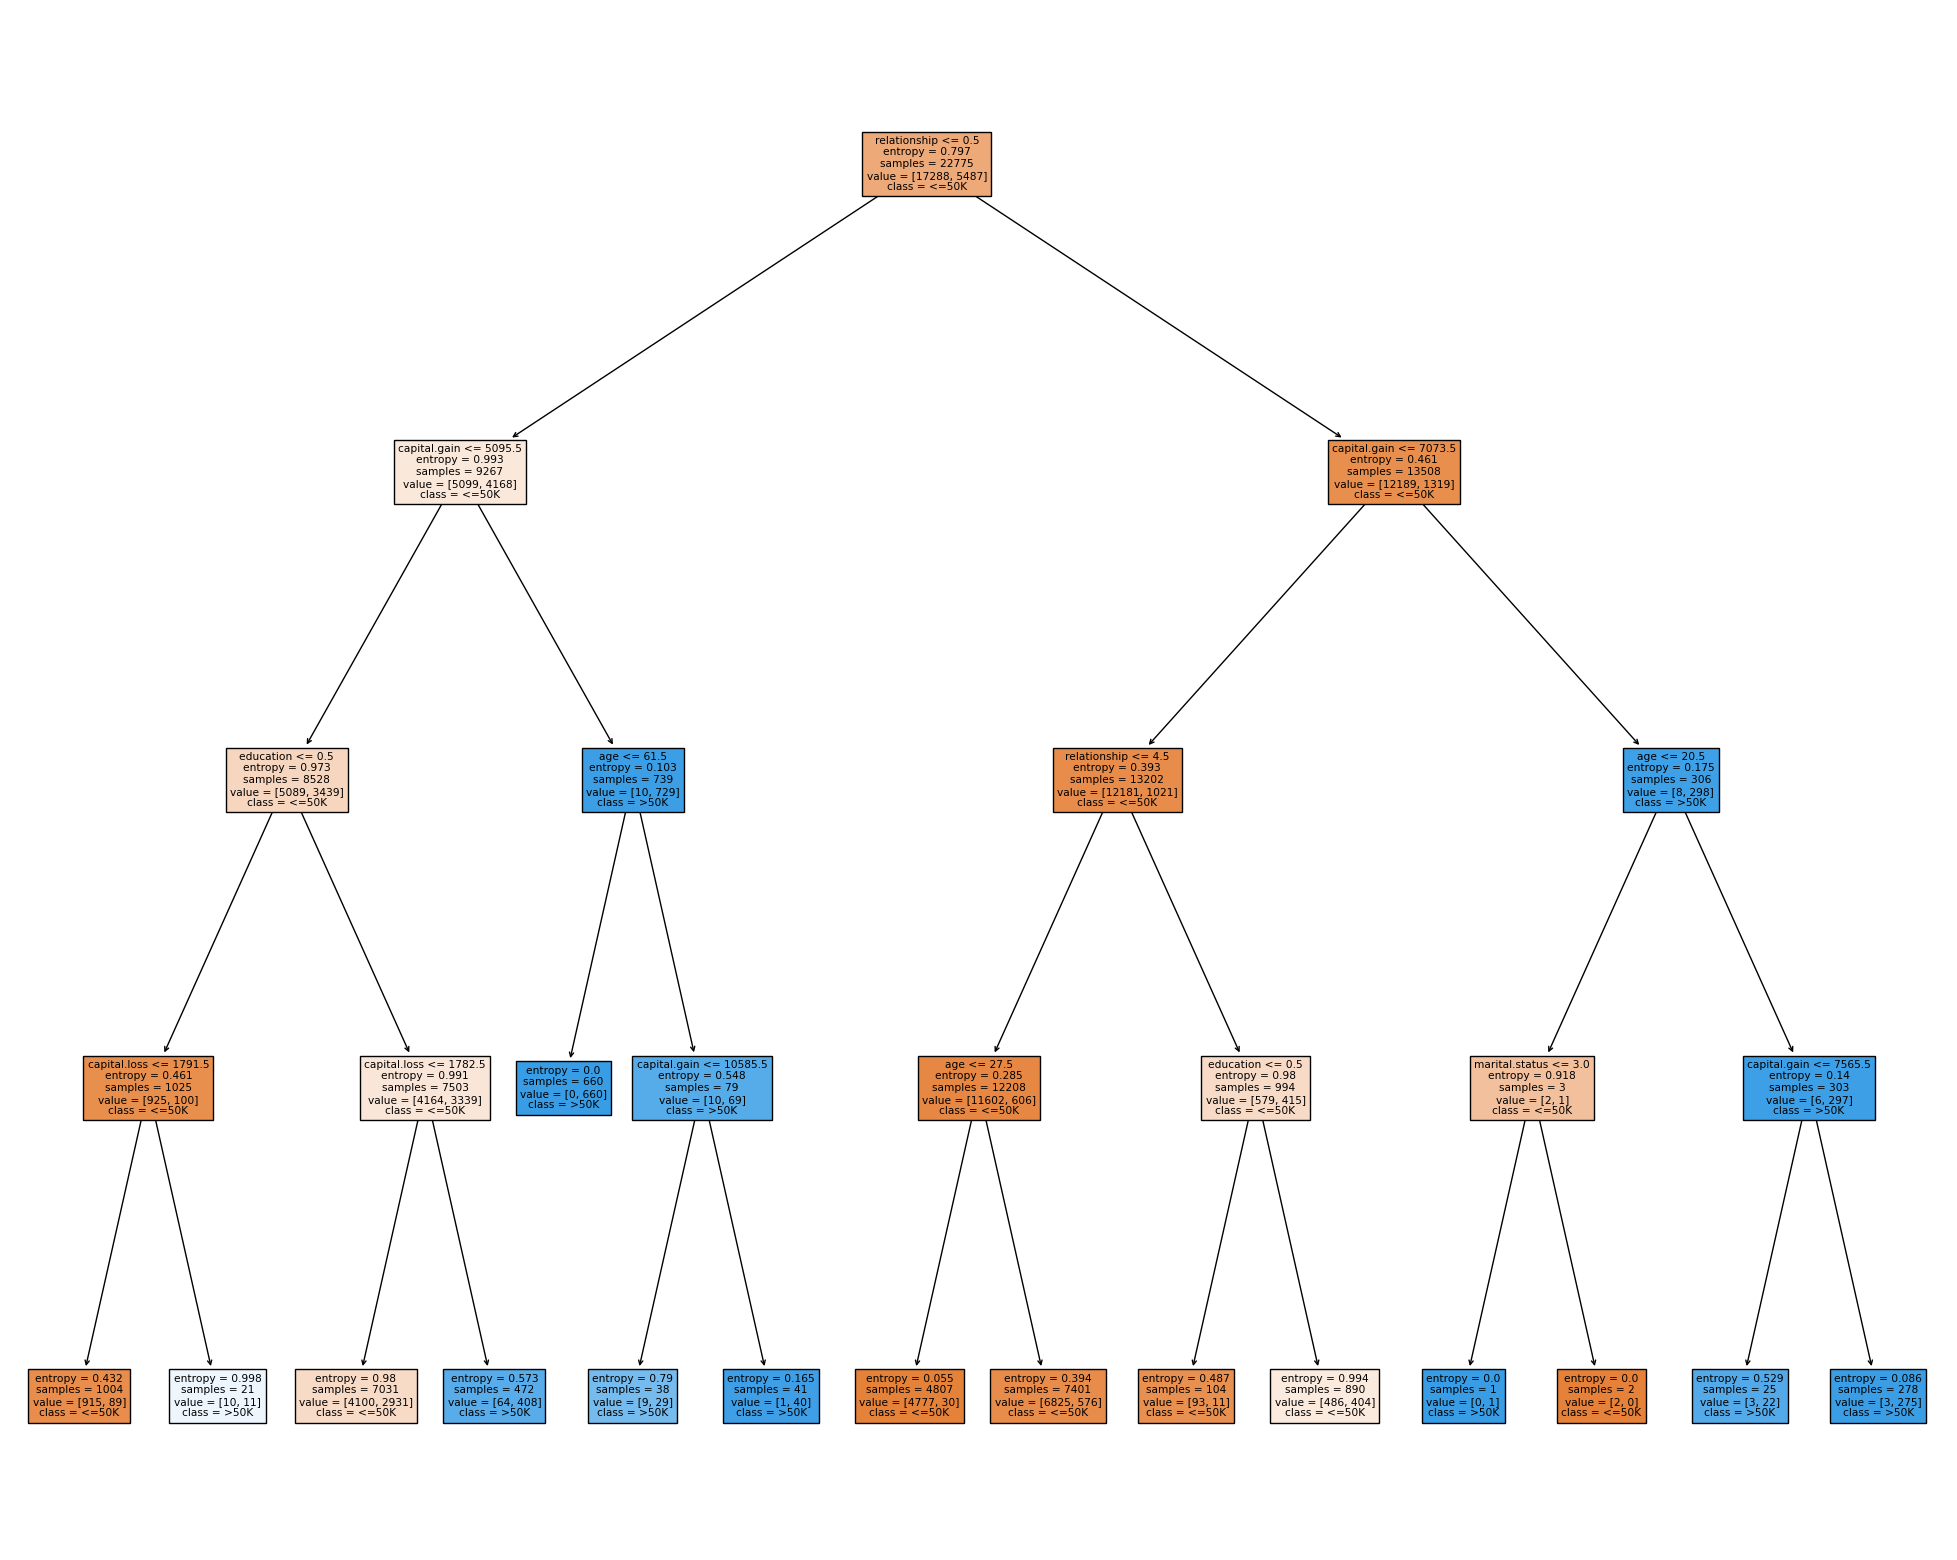

In [47]:
fitur = X_train.columns
target = df['income'].unique().tolist()
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model_dtree,
                   feature_names=fitur,
                   class_names=target,
                   filled=True)

In [ ]:
fig.savefig("decision_tree.png")

#Export Model

In [ ]:
with open("models.pkl", "wb") as f:
    pickle.dump(model_dtree, f)